<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
features = pd.read_csv("/Users/FH/Desktop/Ironhack/Github/Project-week-3-Recommendations/Data/audio_features.csv")

In [4]:
features = features.drop(columns = ["type", "id", "uri", "track_href", "analysis_url", "duration_ms", "time_signature"])


In [5]:
standardized_features = StandardScaler().fit_transform(features)

In [6]:
pd.DataFrame(standardized_features, columns=features.columns)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.028516,0.533745,1.583029,0.882386,-1.227129,-0.348987,-0.603896,-0.360343,-0.556087,-0.835848,-0.542031
1,0.207751,0.730109,1.026887,0.581212,-1.227129,-0.702185,-0.067120,-0.303999,0.181678,-0.273524,0.127062
2,0.431794,0.115181,0.470745,0.246227,0.814910,-0.621105,-0.719452,-0.360299,0.472902,-0.055309,-0.353244
3,0.547017,-0.334387,0.748816,0.283796,0.814910,-0.547800,-0.346277,-0.360343,-0.575502,-1.624780,-0.239787
4,-1.386158,-1.435055,0.192673,-0.671068,-1.227129,0.921637,1.962356,-0.360343,-0.594270,-1.150581,2.047252
...,...,...,...,...,...,...,...,...,...,...,...
13925,1.161536,-0.701276,-1.475753,0.483847,0.814910,-0.555575,-0.075404,-0.360237,-0.875785,1.866664,-0.245445
13926,0.873480,-0.417066,1.304958,-0.708637,0.814910,-0.436731,-0.004994,-0.360343,-0.609802,1.778539,-0.169376
13927,0.425393,0.290875,0.192673,0.100963,0.814910,-0.520033,0.794372,-0.360343,2.673255,1.614877,-0.424728
13928,1.027110,0.099679,-1.475753,-0.029274,0.814910,-0.634434,1.096722,0.319672,-0.644101,1.887646,-0.227213


In [7]:
inertia = []
for i in range(2,25):
    k_mean = KMeans(n_clusters=i, random_state=32)
    k_mean.fit(features)
    inertia.append(k_mean.inertia_)

print(inertia)

[4265358.893205605, 1856633.61972441, 1337495.1241155637, 965960.2016674426, 802164.899575042, 678524.3007936686, 602832.5996625363, 539083.8534067164, 502144.80974637595, 471771.7851907726, 442886.50406736415, 420703.72930093535, 402788.8470387291, 384787.56690530706, 369111.09157903446, 352452.11193063675, 342975.88980426686, 330740.1602756258, 321826.46665921283, 306436.7636857629, 298096.9267553027, 288924.1273086184, 281444.4696738021]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

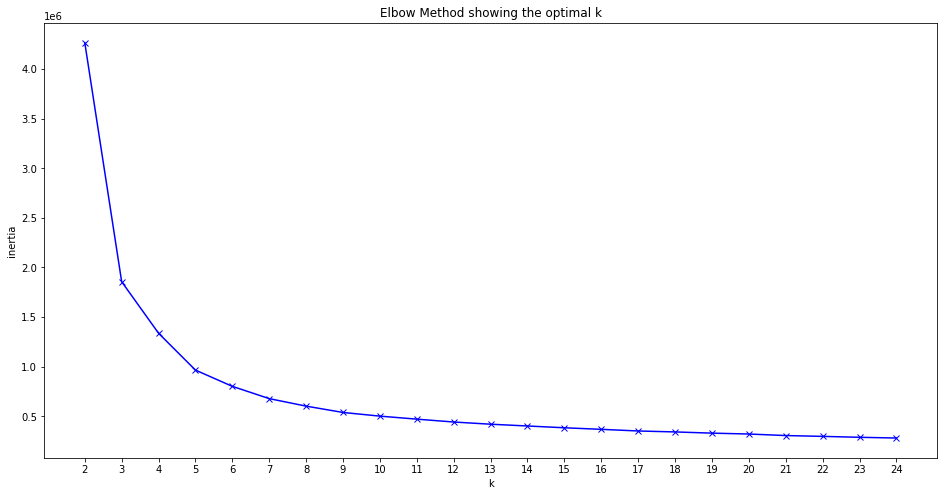

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(range(2,25), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(range(2,25)), max(range(2,25))+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [9]:
silhouette = []
for i in range(2,25):
    k_mean = KMeans(n_clusters=i, random_state=32)
    k_mean.fit(features)
    silhouette.append(silhouette_score(features, k_mean.predict(features)))

print(silhouette)

[0.526796055173066, 0.5375521158416184, 0.4863748321666128, 0.4490039109443148, 0.3990483138558951, 0.3967474268969021, 0.34447245112572455, 0.34387877237398123, 0.30818003325365945, 0.2979174768466257, 0.29162175264264206, 0.2838945219870972, 0.28318223520937064, 0.2774706997807733, 0.2815908294915751, 0.2848564313155017, 0.28292827073213944, 0.2769694049157504, 0.275153569039295, 0.2910319792309053, 0.2886096449070029, 0.29029599766186165, 0.28332408990399516]


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

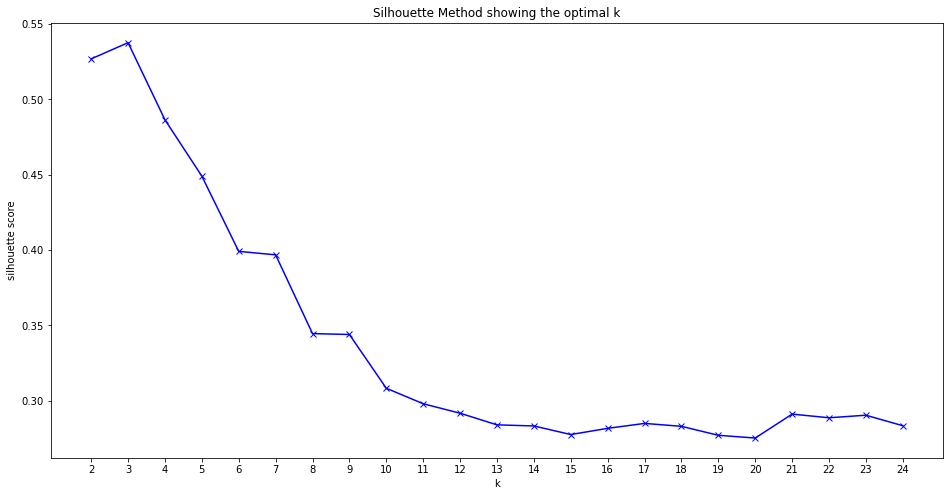

In [10]:
plt.figure(figsize=(16,8))
plt.plot(range(2,25), silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(range(2,25)), max(range(2,25))+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [11]:
features_kmean = KMeans(n_clusters=3, random_state=32)
features_kmean.fit(features)
clusters = features_kmean.predict(features)
pd.Series(clusters).value_counts().sort_index()

0    6460
1    2328
2    5142
dtype: int64

In [12]:
features_kmean2 = KMeans(n_clusters=5, random_state=32)
features_kmean2.fit(features)
clusters = features_kmean2.predict(features)
pd.Series(clusters).value_counts().sort_index()

0    2064
1    3512
2    5053
3    2006
4    1295
dtype: int64

In [14]:
import pickle

pickle_out = open("kmeans_features.pickle","wb")
pickle.dump(features_kmean, pickle_out)
#pickle_out.close()

